# 径流数据处理

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
from hydra import compose, initialize
import os

# 加载项目层面的配置
with initialize(version_base=None, config_path="../config"):
    cfg = compose(config_name="config")
os.chdir(cfg.root)

## 水库水位

In [2]:
df = pd.read_excel("data/十大控制水库.xlsx")
df.head()

,单位,年,月,龙羊峡,刘家峡,海勃湾,万家寨,三门峡,小浪底,古贤（待）,河口村,故县,陆浑
0,m,2020,1,2597.284000,1728.034333,1073.754000,967.535667,NaN,261.05,NaN,236.217261,526.801333,310.038333
1,m,2020,2,2595.902500,1729.711071,1074.471786,969.603929,NaN,264.73,NaN,235.911486,526.966071,310.073571
2,m,2020,3,2594.163333,1733.526667,1074.055333,966.270667,NaN,266.34,NaN,235.259060,525.783333,310.480000
3,m,2020,4,2592.213793,1730.070345,1075.820690,974.723103,NaN,262.94,NaN,234.529171,523.802069,309.383448
4,m,2020,5,2590.605000,1726.721000,1075.571333,975.874000,NaN,254.47,NaN,233.422819,522.225333,309.293000


In [3]:
level = (
    df.groupby("年")
    .mean(numeric_only=True)
    .iloc[:, 1:]
    .dropna(how="all", axis=0)
    .dropna(how="all", axis=1)
)
level.head()

,龙羊峡,刘家峡,海勃湾,万家寨,三门峡,小浪底,河口村,故县,陆浑
年,,,,,,,,,
1960,NaN,NaN,NaN,NaN,298.253333,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,327.565833,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,311.376667,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,311.114167,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,315.077500,NaN,NaN,NaN,NaN


<Axes: xlabel='年'>

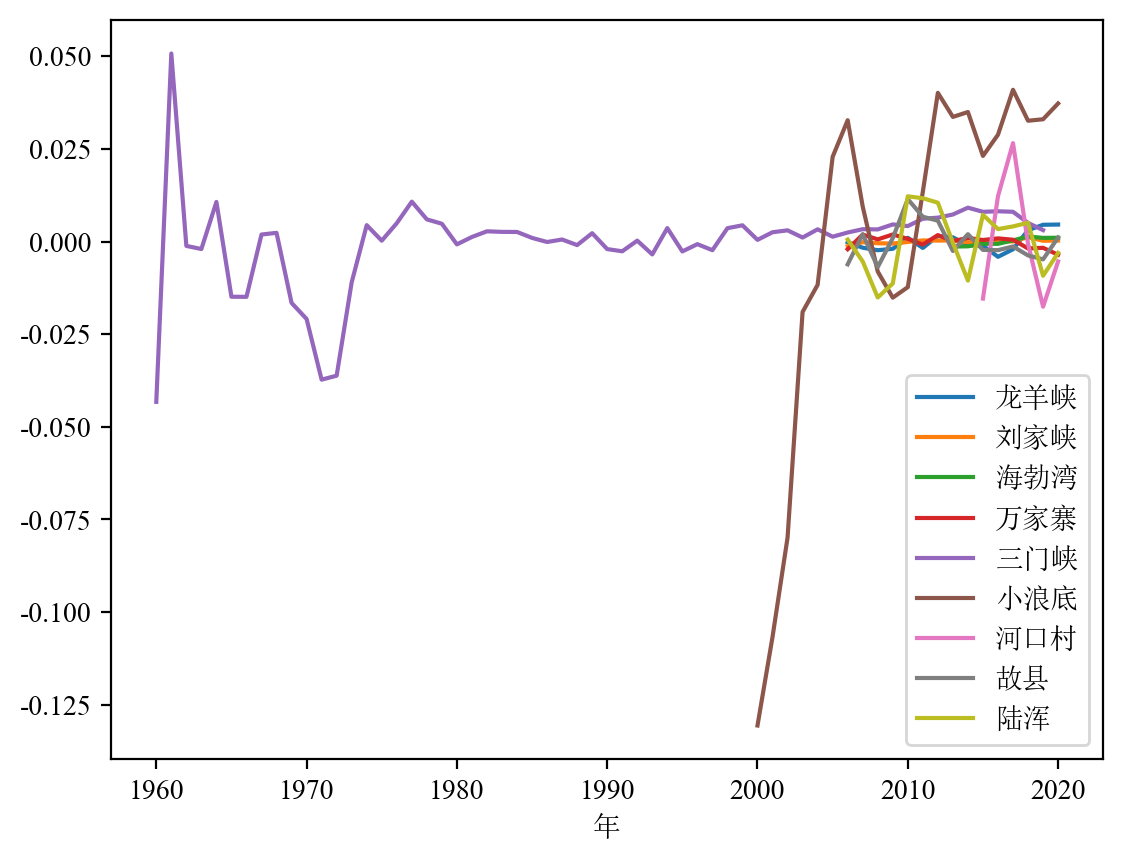

In [5]:
from mksci_font import config_font

config_font()
((level - level.mean()) / level.mean()).plot()

## 水库流量

In [6]:
inflow = pd.read_excel("data/十大控制水库.xlsx", 1).iloc[:, 1:]
outflow = pd.read_excel("data/十大控制水库.xlsx", 2).iloc[:, 1:]
outflow.head()
inflow.head()

,年,月,龙羊峡,刘家峡,海勃湾,万家寨,三门峡,小浪底,古贤（待）,河口村,故县,陆浑
0,2020,1,NaN,NaN,814.0,NaN,NaN,417.39,NaN,3.08,1.48,3.030
1,2020,2,NaN,NaN,558.0,NaN,NaN,504.07,NaN,1.99,2.07,3.550
2,2020,3,NaN,NaN,545.0,NaN,NaN,899.77,NaN,2.26,5.21,2.250
3,2020,4,NaN,NaN,482.0,NaN,NaN,1458.83,NaN,2.24,3.34,0.660
4,2020,5,NaN,NaN,801.0,NaN,NaN,1347.42,NaN,1.90,2.56,0.349


,年,月,龙羊峡,刘家峡,海勃湾,万家寨,三门峡,小浪底,古贤（待）,河口村,故县,陆浑
0,2020,1,NaN,NaN,821.0,NaN,NaN,605.52,NaN,1.31,1.31,5.94
1,2020,2,NaN,NaN,737.0,NaN,NaN,815.75,NaN,1.22,1.28,3.08
2,2020,3,NaN,NaN,625.0,NaN,NaN,775.74,NaN,1.17,2.03,8.12
3,2020,4,NaN,NaN,757.0,NaN,NaN,818.83,NaN,1.17,1.44,5.49
4,2020,5,NaN,NaN,1150.0,NaN,NaN,699.97,NaN,1.29,1.66,4.22


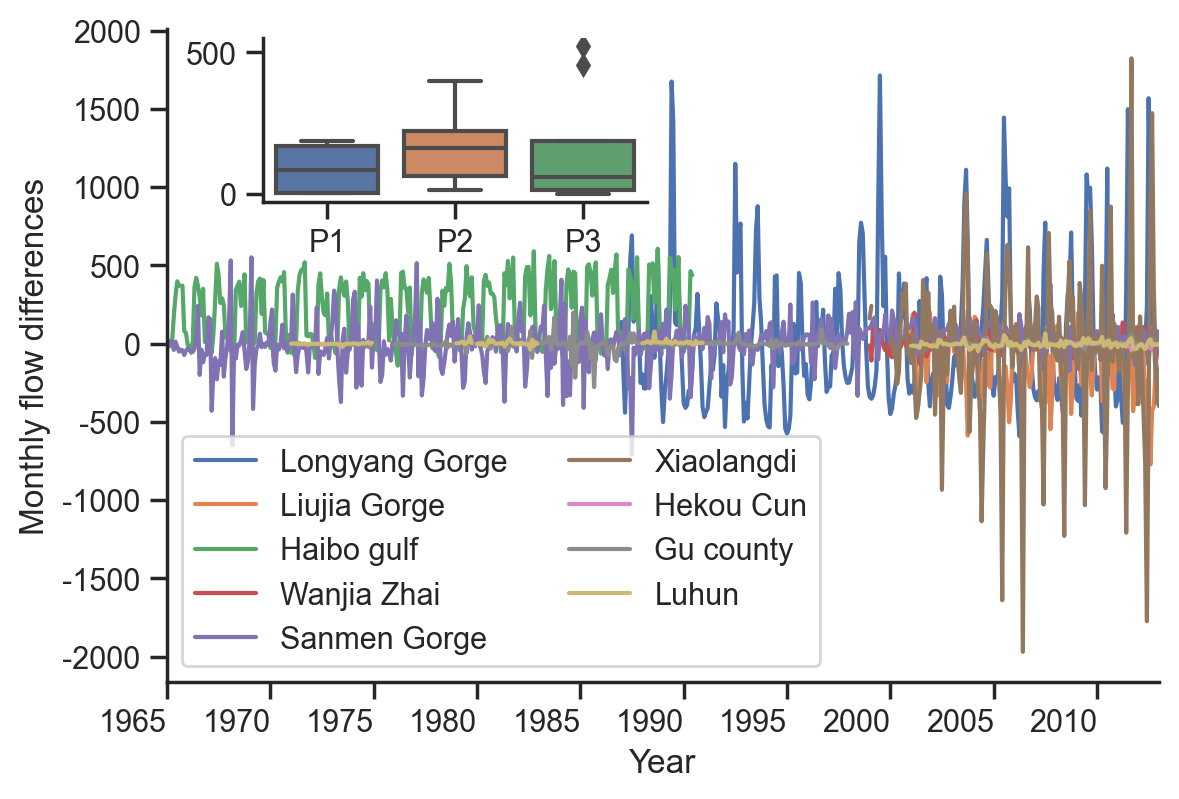

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

date = pd.to_datetime(inflow["年"].astype(str) + "-" + inflow["月"].astype(str) + "-01")
difference = (
    (inflow - outflow)
    .iloc[:, 2:]
    .set_index(date)
    .dropna(axis=1, how="all")
    .loc["1965":"2013"]
)

mapping = {
    "龙羊峡": "Longyang Gorge",
    "小浪底": "Xiaolangdi",
    "刘家峡": "Liujia Gorge",
    "河口村": "Hekou Cun",
    "海勃湾": "Haibo gulf",
    "故县": "Gu county",
    "万家寨": "Wanjia Zhai",
    "陆浑": "Luhun",
    "三门峡": "Sanmen Gorge",
}
difference.rename(mapping, axis=1, inplace=True)

ax = difference.plot(rot=0)
# ax.axvline("1978", ls='--', lw=1.5, color='gray', label='Breakpoint')
# ax.axvline("2001", ls='--', lw=1.5, color='gray')

ax.legend(loc="lower left", ncol=2)
ax.set_xlim("1965", "2013")
ax.set_ylabel("Monthly flow differences")
ax.set_xlabel("Year")

rect = [0.2, 0.7, 0.3, 0.17]
ax2 = ax.figure.add_axes(rect)
sd_1 = difference.loc["1965":"1978"].std()
sd_2 = difference.loc["1979":"2001"].std()
sd_3 = difference.loc["2002":"2013"].std()

df = pd.DataFrame(index=["P1", "P2", "P3"], data=[sd_1, sd_2, sd_3])

# custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.boxplot(df.T, ax=ax2)
plt.savefig("figures/sup/conveyance.png", dpi=300);

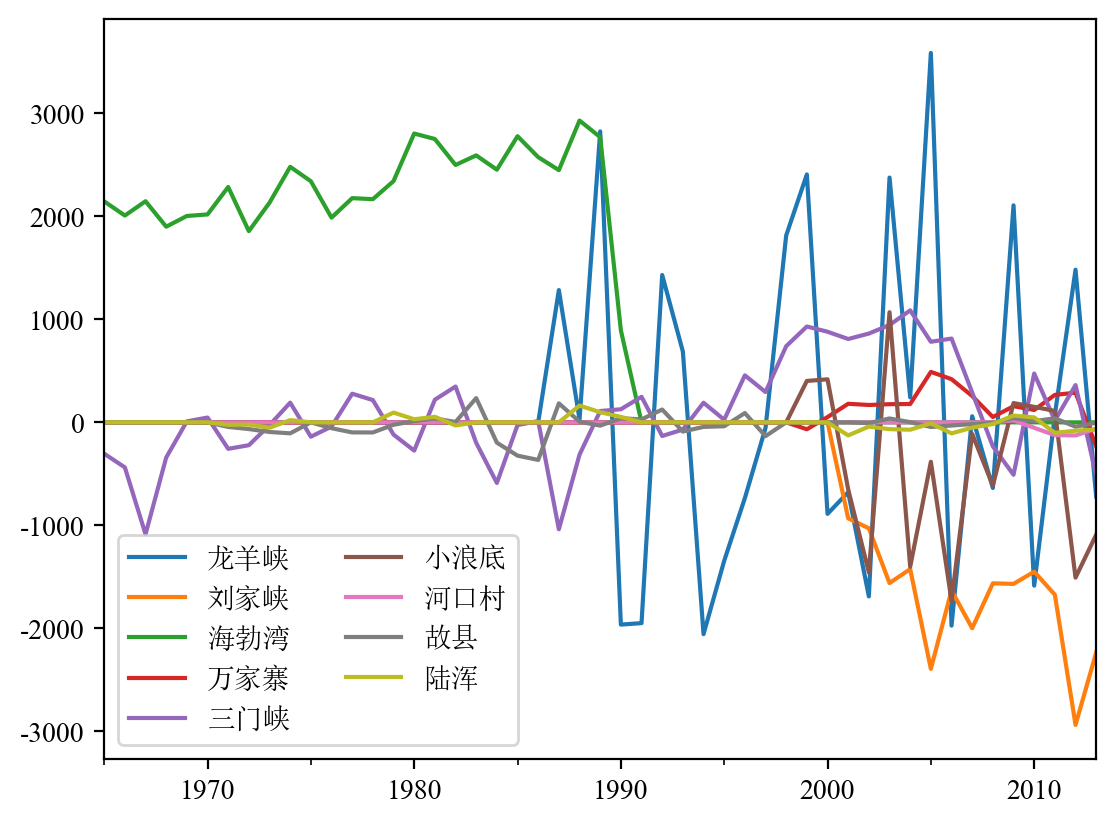

In [13]:
ax = difference.resample("Y").sum().plot()
# ax.set_xlabel('')
ax.legend(loc="lower left", ncol=2)